In [1]:
#Import necessary packages and load dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/j/Desktop/Capstone_Two'

In [3]:
df = pd.read_csv('/Users/j/Desktop/Capstone_Two/adult.data',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.columns = ['age','workclass','fnlwgt','education','educationnum','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','income']

In [6]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


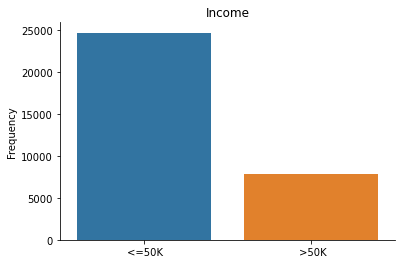

In [7]:
sns.countplot(data=df,
              x='income')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Income')
sns.despine()
plt.show()

In [9]:
df.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [20]:
df['income_bool'] = df.income.apply(lambda x: True if x == ' >50K' else False)

In [21]:
df2 = df.groupby('age').mean()

In [22]:
df2.head()

,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek,income_bool
age,,,,,,
17,185722.232911,6.648101,109.691139,41.751899,21.367089,0.000000
18,193530.207273,8.152727,102.058182,44.336364,25.912727,0.000000
19,204803.543539,9.096910,92.092697,43.915730,30.678371,0.002809
20,198537.705179,9.345286,82.786189,33.298805,32.280212,0.000000
21,200116.997222,9.434722,204.625000,51.636111,34.034722,0.004167


In [23]:
# sns.relplot(x='age',y='income_bool',kind='scatter',data=df2)

In [24]:
df2.index

Int64Index([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 90],
           dtype='int64', name='age')

In [25]:
df2.index[1]

18

In [26]:
df2.index[0]

17

In [36]:
df2 = df2.reset_index()

In [37]:
df2.index

RangeIndex(start=0, stop=73, step=1)

In [41]:
df2['income_bool_pct'] = df2['income_bool'] * 100

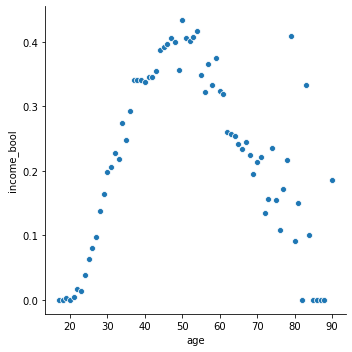

In [44]:
sns.relplot(x='age',y='income_bool',kind='scatter',data=df2)

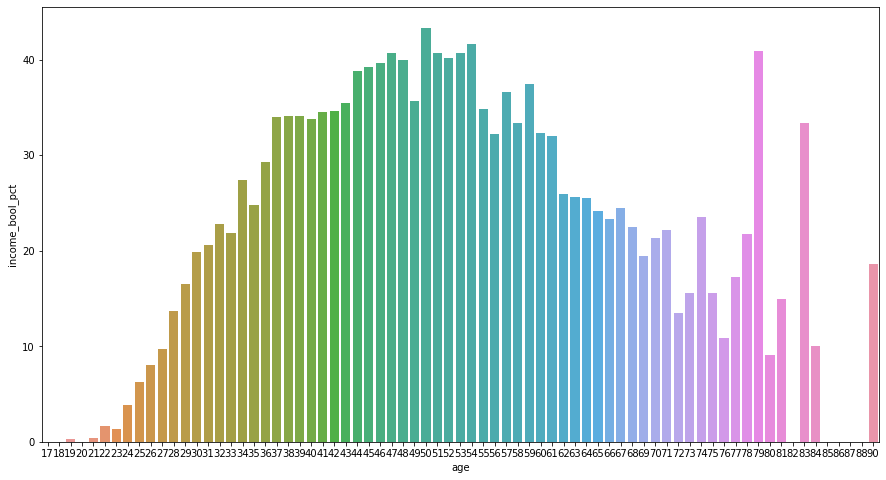

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(x='age',y='income_bool_pct',data=df2)

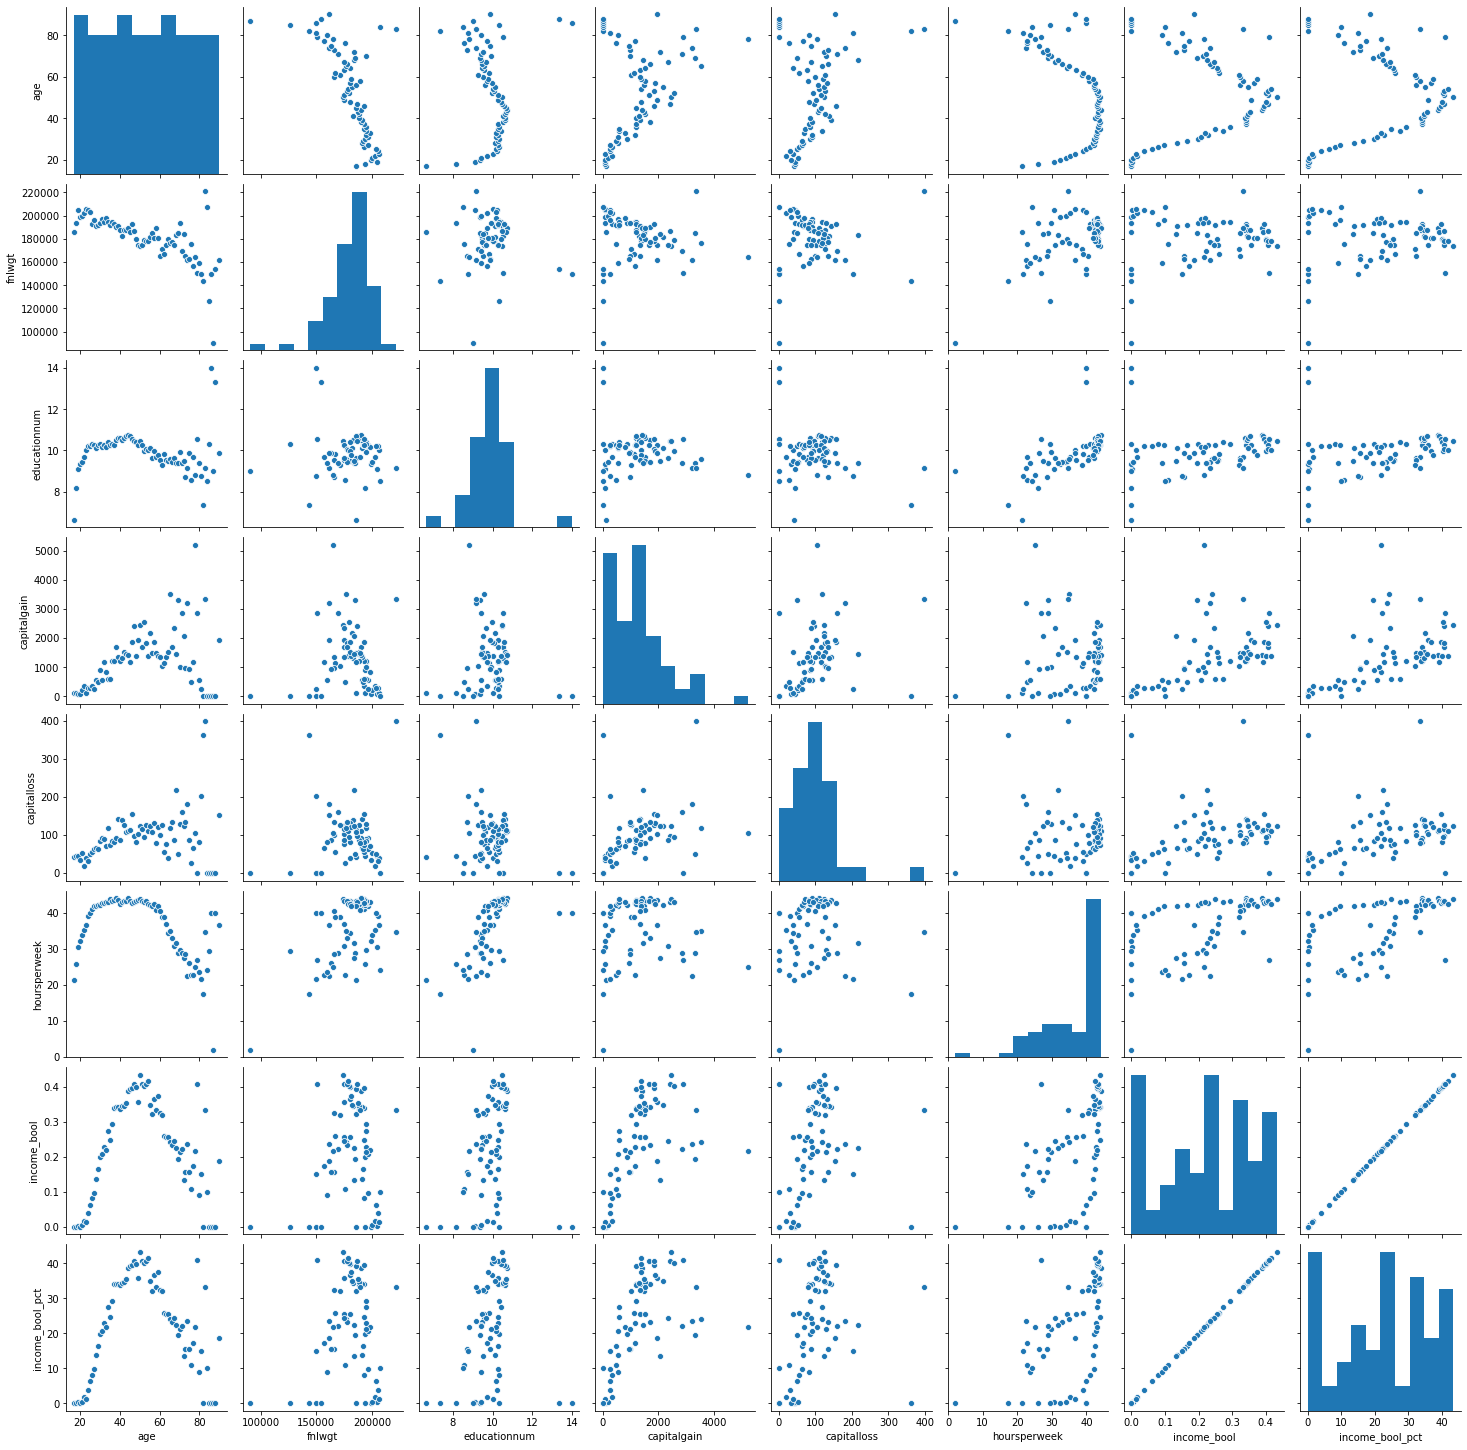

In [49]:
sns.pairplot(df2)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

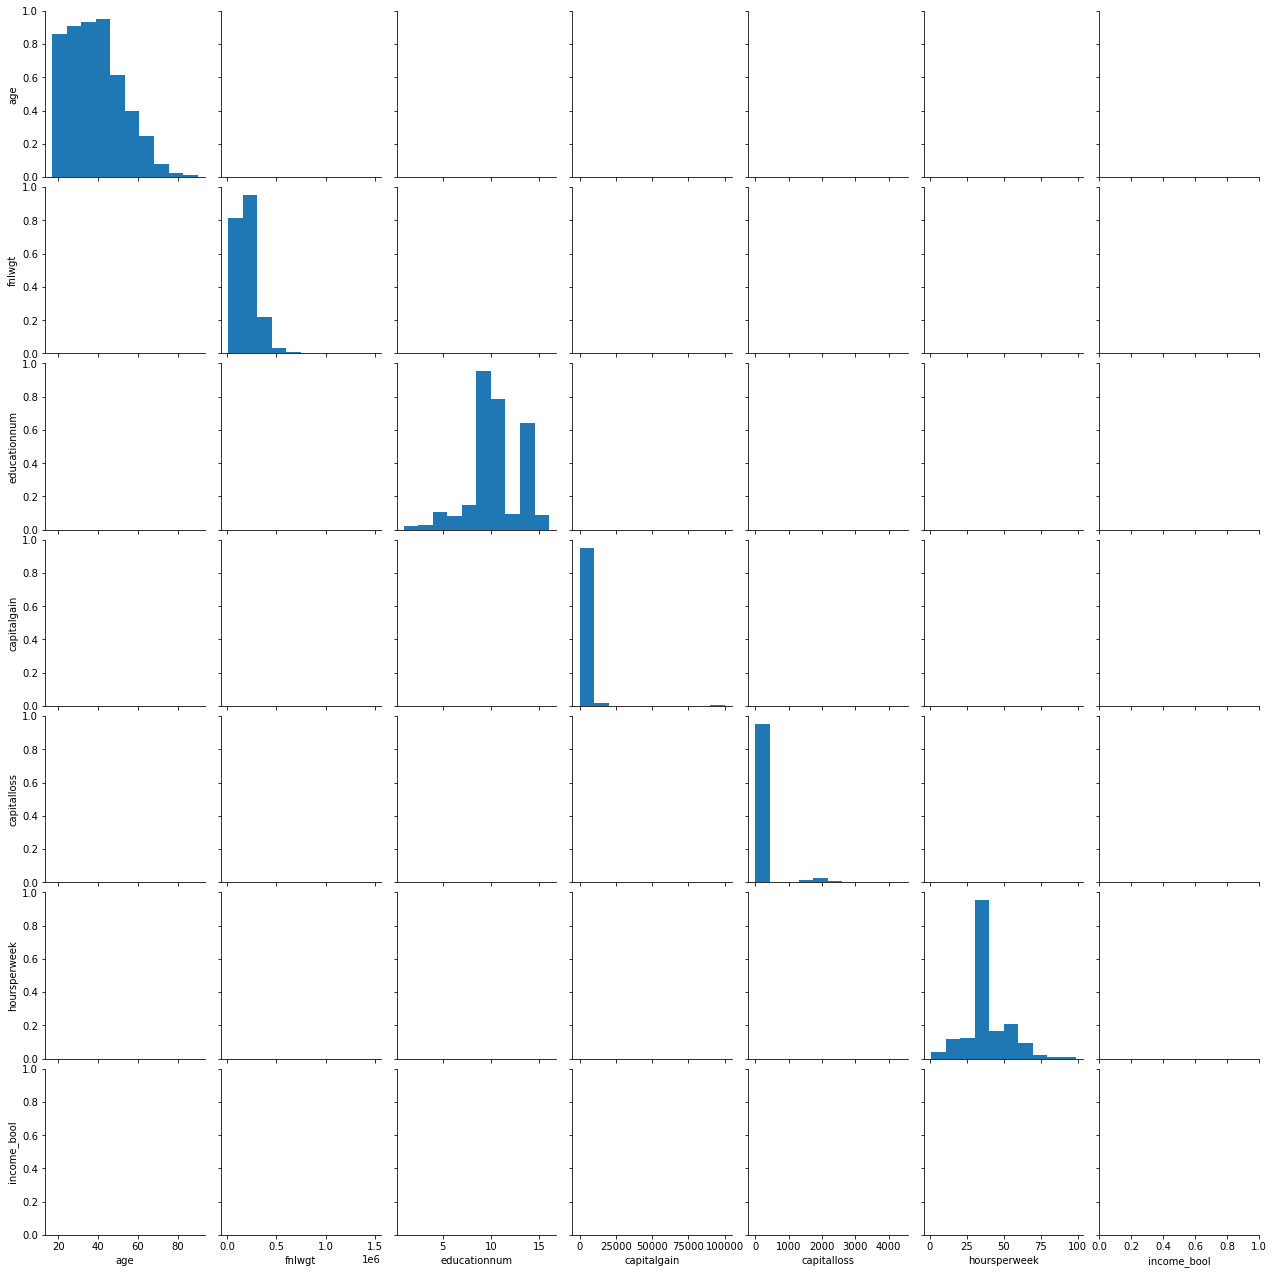

In [52]:
sns.pairplot(df)

In [53]:
# prepping df for pairplot by making df3 that doesn't contain the '-' character.

In [54]:
df3 = df.replace('-','', regex=True)

In [56]:
df3.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income,income_bool
0,39,Stategov,77516,Bachelors,13,Nevermarried,Admclerical,Notinfamily,White,Male,2174,0,40,UnitedStates,<=50K,False
1,50,Selfempnotinc,83311,Bachelors,13,Marriedcivspouse,Execmanagerial,Husband,White,Male,0,0,13,UnitedStates,<=50K,False
2,38,Private,215646,HSgrad,9,Divorced,Handlerscleaners,Notinfamily,White,Male,0,0,40,UnitedStates,<=50K,False
3,53,Private,234721,11th,7,Marriedcivspouse,Handlerscleaners,Husband,Black,Male,0,0,40,UnitedStates,<=50K,False
4,28,Private,338409,Bachelors,13,Marriedcivspouse,Profspecialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

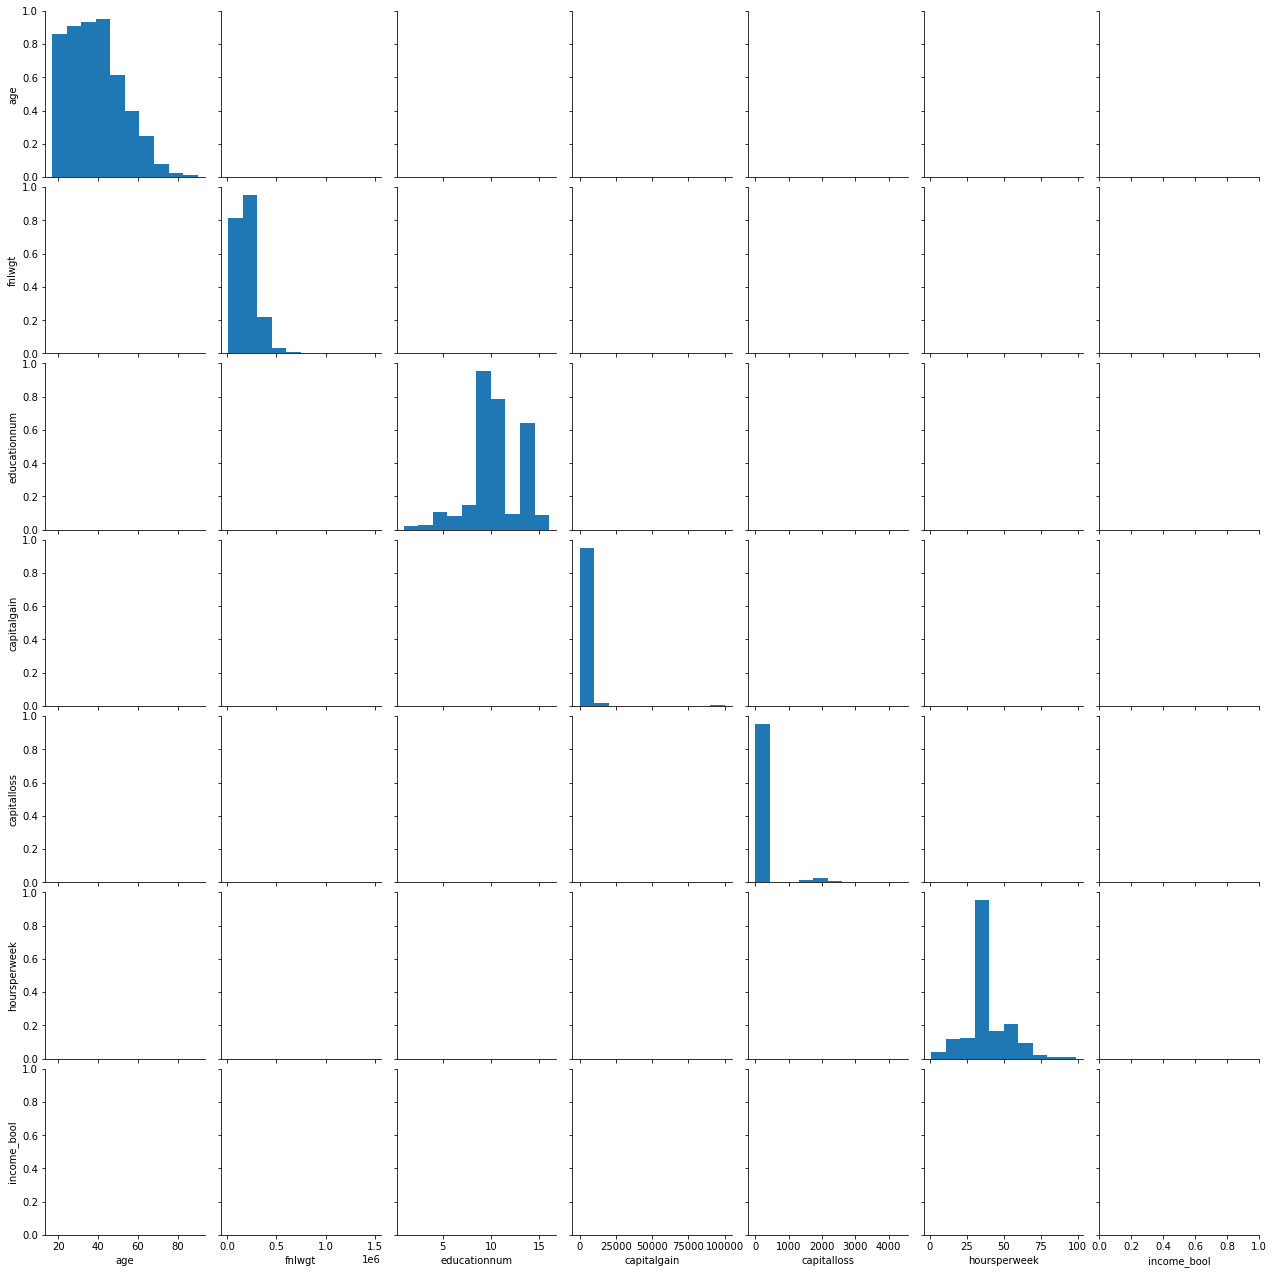

In [57]:
sns.pairplot(df3)

In [59]:
df3.drop(columns='income_bool')

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,Stategov,77516,Bachelors,13,Nevermarried,Admclerical,Notinfamily,White,Male,2174,0,40,UnitedStates,<=50K
1,50,Selfempnotinc,83311,Bachelors,13,Marriedcivspouse,Execmanagerial,Husband,White,Male,0,0,13,UnitedStates,<=50K
2,38,Private,215646,HSgrad,9,Divorced,Handlerscleaners,Notinfamily,White,Male,0,0,40,UnitedStates,<=50K
3,53,Private,234721,11th,7,Marriedcivspouse,Handlerscleaners,Husband,Black,Male,0,0,40,UnitedStates,<=50K
4,28,Private,338409,Bachelors,13,Marriedcivspouse,Profspecialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assocacdm,12,Marriedcivspouse,Techsupport,Wife,White,Female,0,0,38,UnitedStates,<=50K
32557,40,Private,154374,HSgrad,9,Marriedcivspouse,Machineopinspct,Husband,White,Male,0,0,40,UnitedStates,>50K
32558,58,Private,151910,HSgrad,9,Widowed,Admclerical,Unmarried,White,Female,0,0,40,UnitedStates,<=50K
32559,22,Private,201490,HSgrad,9,Nevermarried,Admclerical,Ownchild,White,Male,0,0,20,UnitedStates,<=50K


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

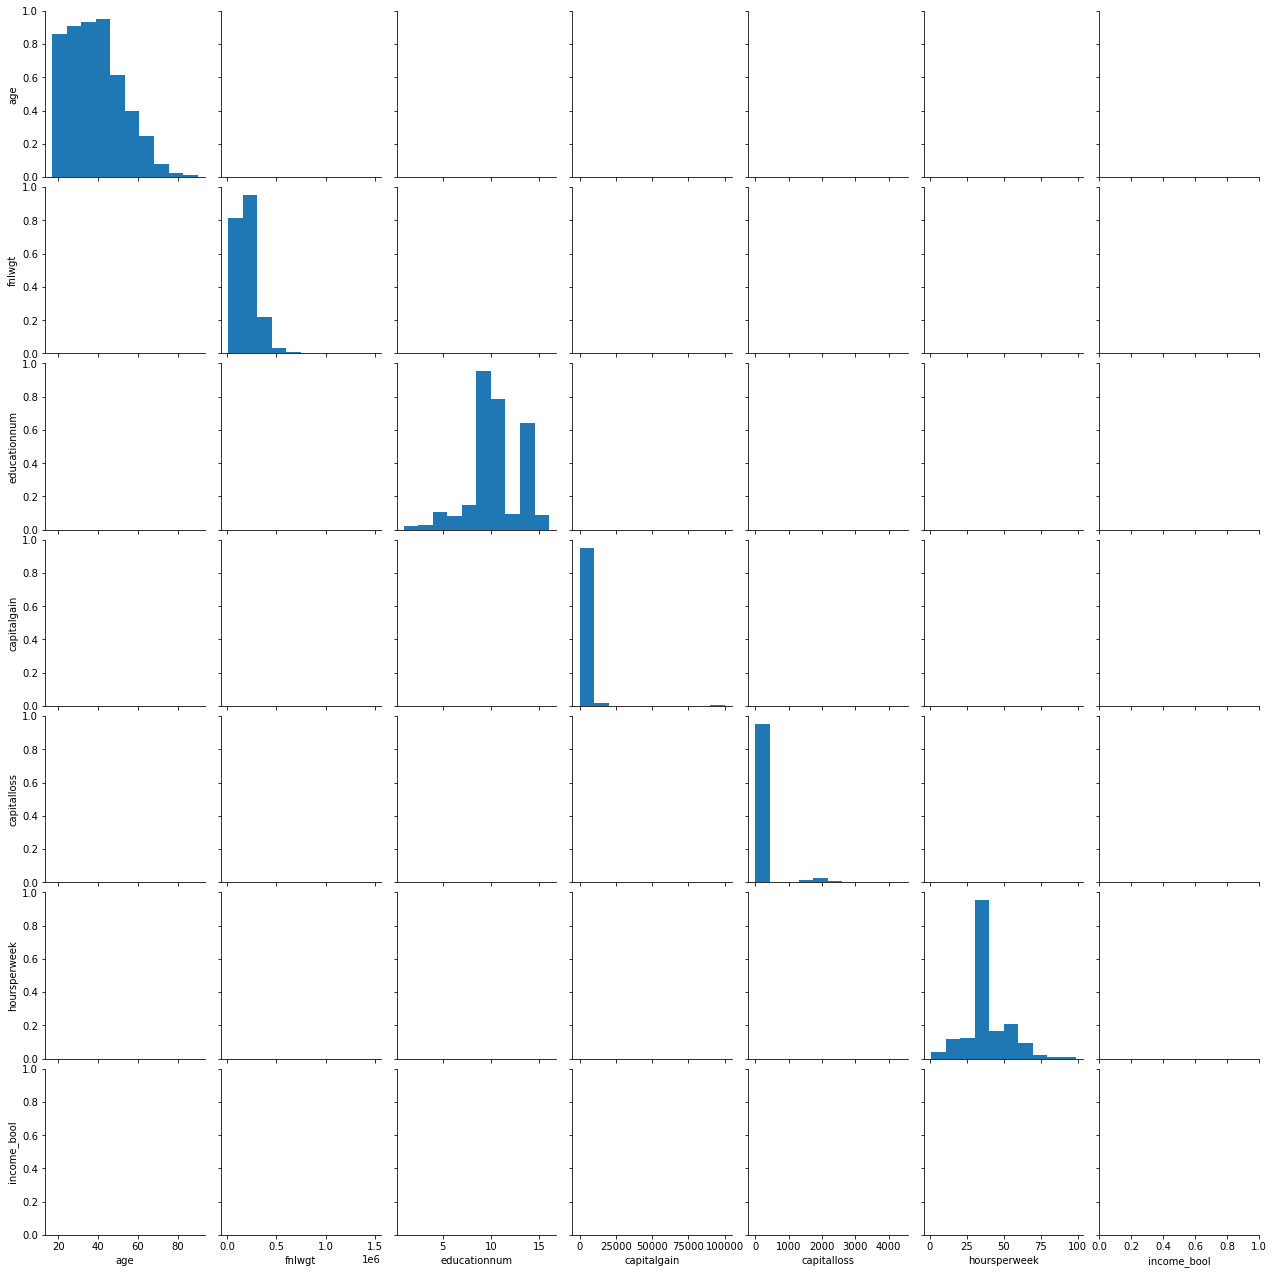

In [60]:
sns.pairplot(df3)

In [61]:
df3.dtypes

age               int64
workclass        object
fnlwgt            int64
education        object
educationnum      int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
income           object
income_bool        bool
dtype: object

In [64]:
df3 = df3.drop(columns='income_bool')

In [65]:
df3.dtypes

age               int64
workclass        object
fnlwgt            int64
education        object
educationnum      int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
income           object
dtype: object

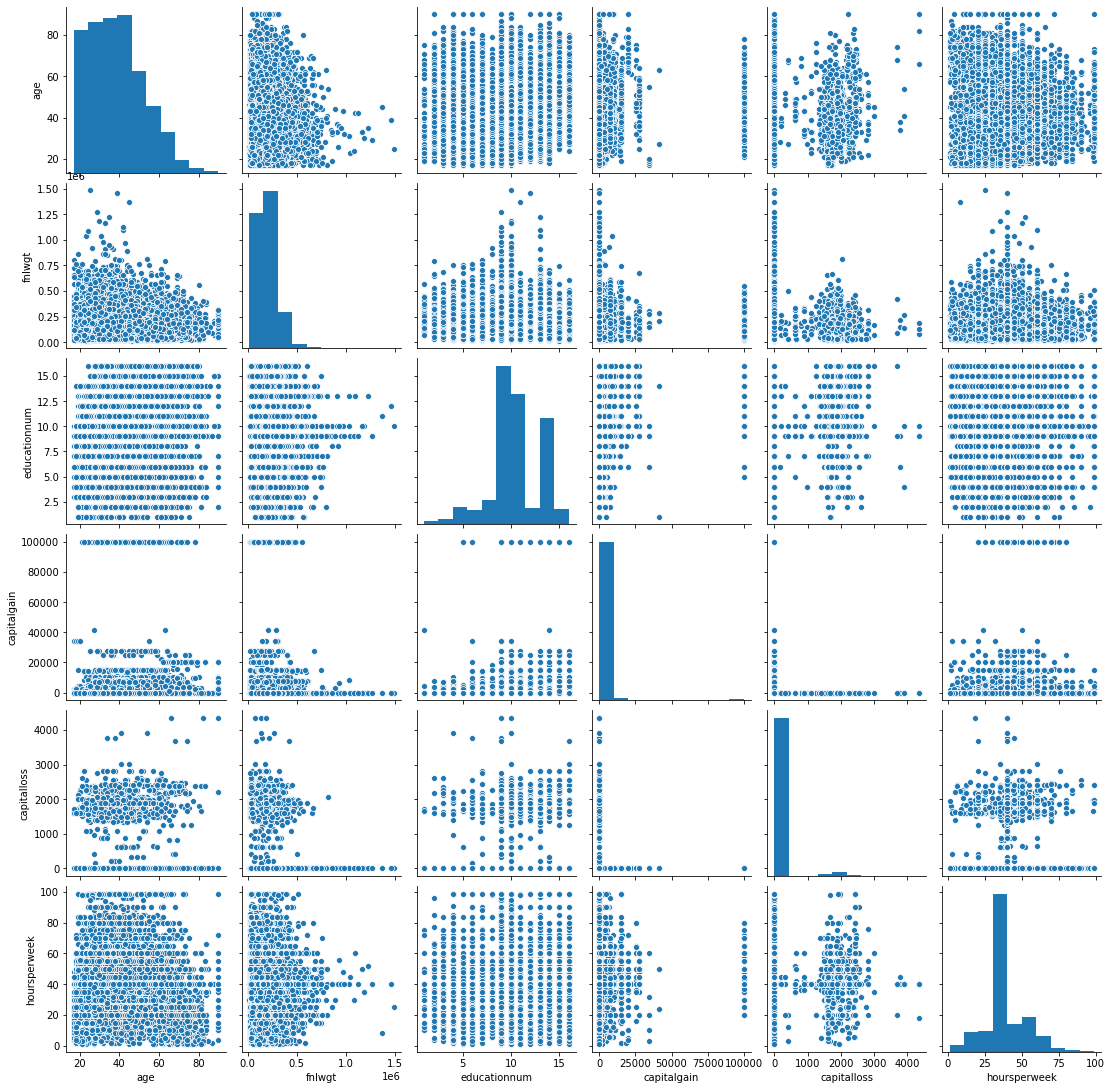

In [66]:
sns.pairplot(df3)